In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

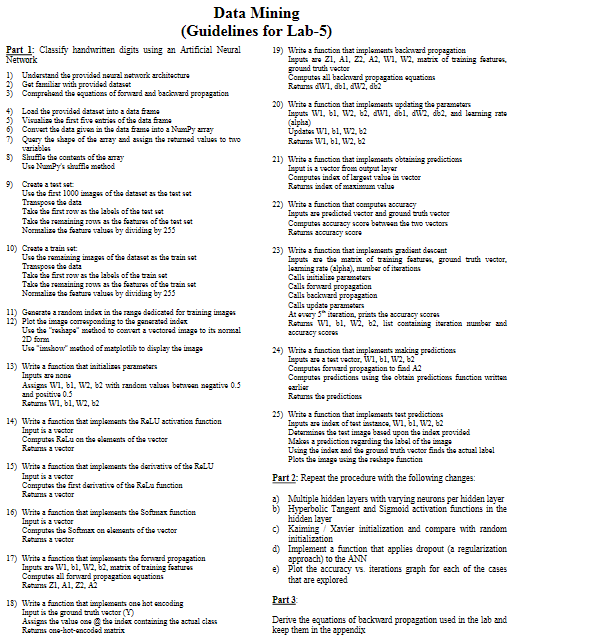

In [3]:
data = pd.read_csv("./digit_data.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df = pd.get_dummies(data["label"], dtype=int)

In [6]:
data_encoded = pd.concat([data,df], axis = 1)

In [7]:
data_encoded = data_encoded.drop(["label"], axis =1)

In [8]:
data_encoded

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
data_test = data_encoded[:1000]
data_test.shape
test_y = data_test.iloc[:, 784:]
test_x = data_test.iloc[:,:784]

In [11]:
data_train = data_encoded[1000:]
data_test.shape
train_y = data_train.iloc[:, 784:]
train_x = data_train.iloc[:,:784]
train_x = np.array(train_x)
train_y = np.array(train_y)

Text(0.5, 1.0, 'The number is 2')

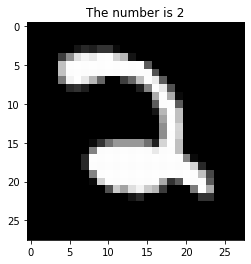

In [12]:
index = int(np.random.random() * data_encoded.shape[0])
plt.imshow(np.array(data.iloc[index, 1:]).reshape((28,28)), cmap="gray")
plt.title(f"The number is {data.iloc[index,0]}")

In [13]:
def initialize_parameters(layer_dims):
    """Layer dims contains the dimension of each layer in the neural network"""
    parameters = {}

    num_layers = len(layer_dims) # as the input layer is taken as 0
    for i in range(1, num_layers):
        parameters[f"W{i}"] = (np.random.random((layer_dims[i-1], layer_dims[i])) - 0.5).T
        parameters[f"b{i}"] = (np.random.random((1, layer_dims[i])) - 0.5).T

    return parameters

In [14]:
def relu(z):
    return np.maximum(0, z)

In [15]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True)) # For numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [16]:
def dropout(X, dropout_rate):
    dropout_mask = (np.random.rand(*X.shape) < 1 - dropout_rate)
    X *= dropout_mask / (1 - dropout_rate)
    return X

In [17]:
def forward_pass(X, parameters, dropout_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    # Apply dropout to the hidden layer activations
    A1 = dropout(A1, dropout_rate)
    # dropout_mask = (np.random.rand(*A1.shape) < 1 - dropout_rate)
    # A1 *= dropout_mask / (1 - dropout_rate)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [18]:
def predict(X, parameters, dropout):
    _, _, _, A2 = forward_pass(X, parameters, dropout)
    return np.argmax(A2, axis=0)

In [19]:
def backward_pass(X, Y, parameters, cache):
    m = Y.shape[1]
    Z1, A1, Z2, A2 = cache
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

In [20]:
def cross_entropy_loss(Y_pred, Y_true):
    m = Y_true.shape[1]
    loss = -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m
    return loss

In [21]:
def update_parameters(parameters, gradients, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [22]:
def train(X, Y, hidden_size, output_size, learning_rate, epochs, dropout_rate):
    input_size = X.shape[0]
    parameters = initialize_parameters([input_size, hidden_size, output_size])

    for epoch in tqdm_notebook(range(epochs), desc="Training progress: "):
        cache = forward_pass(X, parameters, dropout_rate)
        loss = cross_entropy_loss(cache[3], Y)
        gradients = backward_pass(X, Y, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 1 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters

In [23]:
train_x.shape

(41000, 784)

In [24]:
train_y.shape

(41000, 10)

In [25]:
input_size = train_x.shape[1]
output_size = train_y.shape[1]

hidden_size = 64
learning_rate = 0.001
iterations = 1000
epochs = 100
dropout_rate = 0  # Example dropout rate of 20% (0.2)

trained_parameters = train(train_x.T, train_y.T, hidden_size, output_size, learning_rate, epochs, dropout_rate)
predictions = predict(test_x.T, trained_parameters, dropout_rate)

# Calculate accuracy
accuracy = np.mean(predictions == np.argmax(test_y.T, axis=0))
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Training progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0, Loss: 15.3951
Epoch 1, Loss: 14.6658
Epoch 2, Loss: 15.4005
Epoch 3, Loss: 12.9653
Epoch 4, Loss: 11.6906
Epoch 5, Loss: 10.7168
Epoch 6, Loss: 10.0093
Epoch 7, Loss: 9.4929
Epoch 8, Loss: 9.0356
Epoch 9, Loss: 8.6566
Epoch 10, Loss: 8.3186
Epoch 11, Loss: 8.0310
Epoch 12, Loss: 7.7746
Epoch 13, Loss: 7.5602
Epoch 14, Loss: 7.3516
Epoch 15, Loss: 7.1706
Epoch 16, Loss: 7.0041
Epoch 17, Loss: 6.8478
Epoch 18, Loss: 6.6969
Epoch 19, Loss: 6.5709
Epoch 20, Loss: 6.4456
Epoch 21, Loss: 6.3280
Epoch 22, Loss: 6.2240
Epoch 23, Loss: 6.1312
Epoch 24, Loss: 6.0336
Epoch 25, Loss: 5.9351
Epoch 26, Loss: 5.8430
Epoch 27, Loss: 5.7569
Epoch 28, Loss: 5.6766
Epoch 29, Loss: 5.5991
Epoch 30, Loss: 5.5250
Epoch 31, Loss: 5.4594
Epoch 32, Loss: 5.3999
Epoch 33, Loss: 5.3470
Epoch 34, Loss: 5.2948
Epoch 35, Loss: 5.2440
Epoch 36, Loss: 5.1940
Epoch 37, Loss: 5.1451
Epoch 38, Loss: 5.0977
Epoch 39, Loss: 5.0527
Epoch 40, Loss: 5.0098
Epoch 41, Loss: 4.9699
Epoch 42, Loss: 4.9309
Epoch 43, Loss